In [ ]:
import kagglehub
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
# Загрузка датасета
dataset_path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

In [27]:
# Определяем преобразования для изображений
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Изменение размера (можно адаптировать)
    transforms.ToTensor(),          # Преобразование в тензор
])


In [28]:
# Список тензоров и меток
image_tensors = []
labels = []

# Проход по всем файлам в датасете
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith((".jpg", ".png", ".jpeg")):  # Проверяем формат
            img_path = os.path.join(root, file)
            img = Image.open(img_path).convert("RGB")  # Открываем и конвертируем в RGB
            img_tensor = transform(img)  # Преобразуем в тензор
            image_tensors.append(img_tensor)

            # Метка = название папки (если есть структура классов)
            label = os.path.basename(root)
            labels.append(label)


In [29]:

# Преобразуем в единый тензорный массив
image_tensors = torch.stack(image_tensors)

print("Размерность массива тензоров:", image_tensors.shape) 

Размерность массива тензоров: torch.Size([7023, 3, 256, 256])


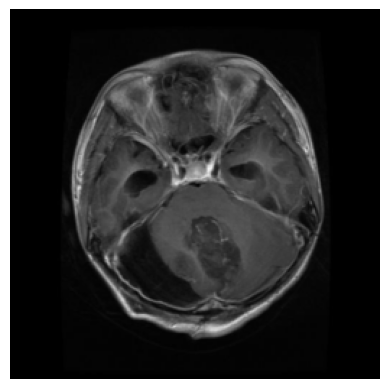

In [30]:


def show_image(tensor):
    transform = transforms.ToPILImage()
    img = transform(tensor)
    plt.imshow(img)
    plt.axis("off")  # Отключаем оси
    plt.show()

show_image(image_tensors[0])